<a href="https://colab.research.google.com/github/nalgo-intern/team-a-2025-summer-08-04/blob/ryotaro_branch/one_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("numpy :", np.__version__)
print("pandas :", pd.__version__)
print("tensorflow :", tf.__version__)
print("matplotlib :", matplotlib.__version__)

numpy : 2.0.2
pandas : 2.2.2
tensorflow : 2.18.0
matplotlib : 3.10.0


In [3]:
CSV_FILE_PATH = "trainlog.csv"
if not os.path.exists(CSV_FILE_PATH):
    pathlib.Path(CSV_FILE_PATH).touch()

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
del mnist

In [5]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (60000, 28, 28)
y_train :  (60000,)
X_test :  (10000, 28, 28)
y_test :  (10000,)


y_train (i=1):  0
X_train (i=1): 


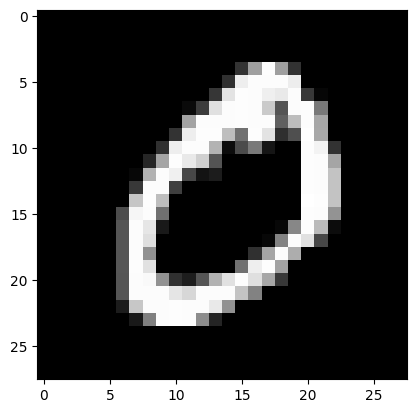

y_train (i=10):  3
X_train (i=10): 


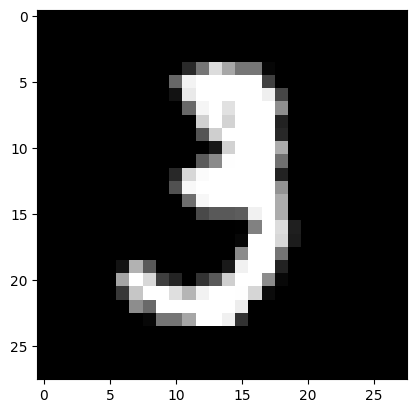

y_train (i=100):  5
X_train (i=100): 


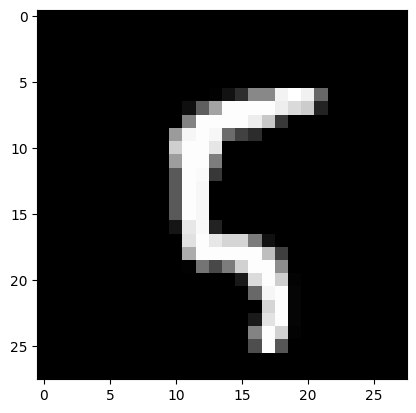

In [6]:
for i in [1,10,100]:
   print("y_train", "(i="+str(i)+"): ", y_train[i])
   print("X_train", "(i="+str(i)+"): ")
   plt.imshow(X_train[i], cmap='gray')
   plt.show()

In [7]:
print("X_train min", X_train.min())
print("X_train max", X_train.max())
print()
X_train, X_test = X_train/255.0, X_test/255.0
print("normalized")
print("X_train min", X_train.min())
print("X_train max", X_train.max())

X_train min 0
X_train max 255

normalized
X_train min 0.0
X_train max 1.0


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name='input'),

    tf.keras.layers.Dense(512, name='dense_1'),
    tf.keras.layers.Activation(tf.nn.relu, name='gelu_1'),

    tf.keras.layers.Dense(256, name='dense_2'),
    tf.keras.layers.Activation(tf.nn.relu, name='gelu_2'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, name='dense_3'),
    tf.keras.layers.Activation(tf.nn.relu, name='gelu_3'),
    tf.keras.layers.Dense(10, name='dense_4'),
    tf.keras.layers.Activation(tf.nn.softmax, name='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Flatten)                 │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gelu_1 (Activation)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gelu_2 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gelu_3 (Activation)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,610 (2.29 MB)

 Trainable params: 601,610 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compiling
# Set model & training information into machine memory (CPU or GPU)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
callbacks = []
callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

In [12]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8783 - loss: 0.4165 - val_accuracy: 0.9662 - val_loss: 0.1081
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9699 - loss: 0.0966 - val_accuracy: 0.9721 - val_loss: 0.0910
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9810 - loss: 0.0599 - val_accuracy: 0.9733 - val_loss: 0.0868
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9856 - loss: 0.0448 - val_accuracy: 0.9785 - val_loss: 0.0658
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9892 - loss: 0.0341 - val_accuracy: 0.9775 - val_loss: 0.0824
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9912 - loss: 0.0291 - val_accuracy: 0.9802 - val_loss: 0.0757
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9913 - loss: 0.0280 - val_accuracy: 0.9793 - val_loss: 0.0744
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9938 - loss: 0.0193 - val_

In [13]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=1)
print("loss(train): {:.4}".format(train_loss))
print("accuracy(train): {:.4}".format(train_acc))

print()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print("loss(test): {:.4}".format(test_loss))
print("accuracy(test): {:.4}".format(test_acc))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9989 - loss: 0.0038
loss(train): 0.004277
accuracy(train): 0.9988

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9785 - loss: 0.1362
loss(test): 0.1145
accuracy(test): 0.9814


In [15]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.931783,0.230405,0.9662,0.108109
1,1,0.971633,0.091074,0.9721,0.091000
2,2,0.980583,0.061447,0.9733,0.086821
3,3,0.985050,0.046802,0.9785,0.065824
4,4,0.988633,0.036817,0.9775,0.082413


In [16]:
epochs = df["epoch"].values
train_acc = df["accuracy"].values
train_loss = df["loss"].values
test_acc = df["val_accuracy"].values
test_loss = df["val_loss"].values

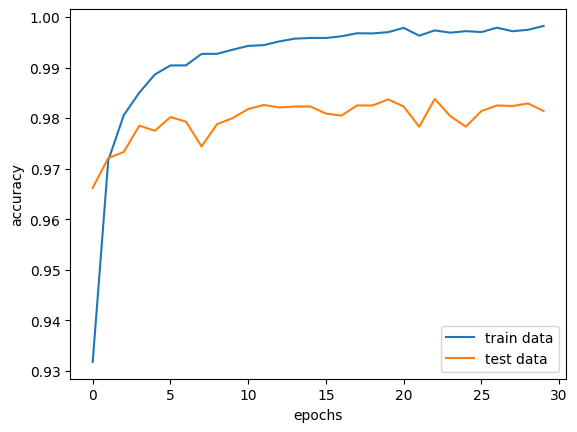

In [17]:
plt.plot(epochs, train_acc, label="train data")
plt.plot(epochs, test_acc, label="test data")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 


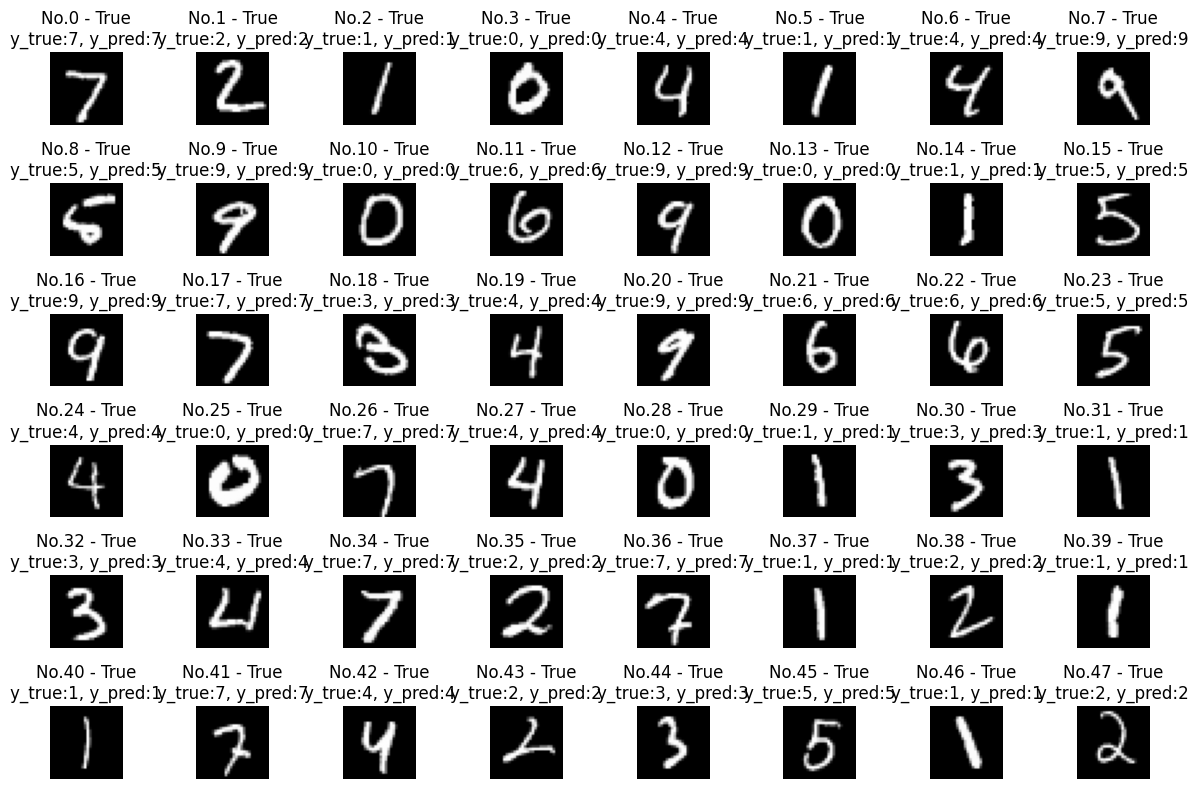

In [24]:
import matplotlib.pyplot as plt
import numpy as np

ROW = 6
COLUMN = 8
num_images = ROW * COLUMN
predictions = model.predict(X_test[:num_images])

y_preds = np.argmax(predictions, axis=1)


fig = plt.figure(figsize=(12, 8))


for i in range(ROW * COLUMN):
    y_true = y_test[i]
    y_pred = y_preds[i]

    if y_true == y_pred:
        result = "True"  # 正解
    else:
        result = "False" # 不正解

    plt.subplot(ROW, COLUMN, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"No.{i} - {result}\ny_true:{y_true}, y_pred:{y_pred}")
    plt.axis("off")

fig.tight_layout()
fig.show()

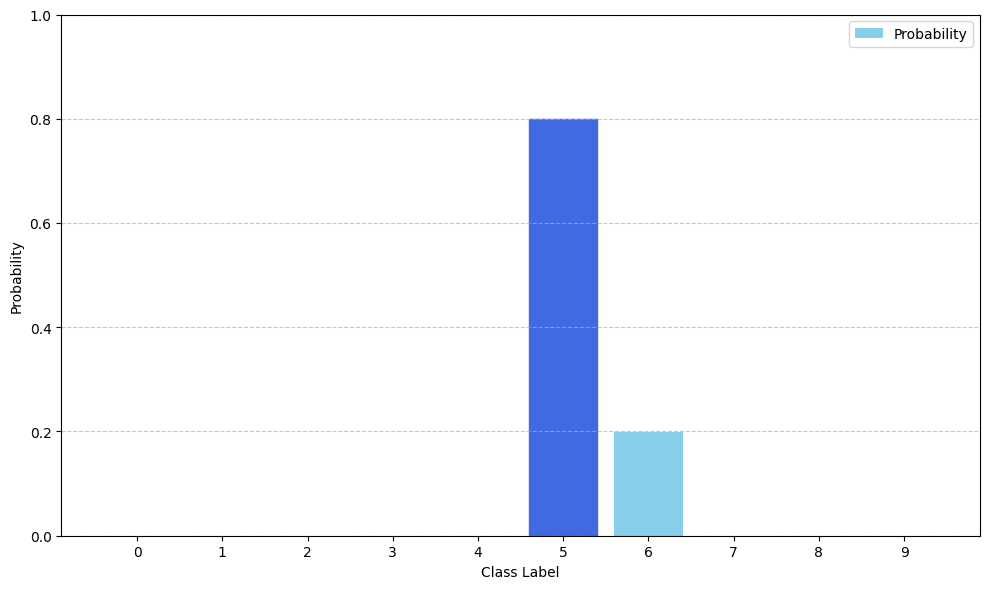

In [25]:
prediction_probabilities = predictions[8]

class_labels = np.arange(len(prediction_probabilities))

# 棒グラフ
plt.figure(figsize=(10, 6))
bars = plt.bar(class_labels, prediction_probabilities, color='skyblue', label='Probability')

plt.xlabel('Class Label')
plt.ylabel('Probability')
plt.xticks(class_labels)  # X軸の目盛りをクラスラベルに設定
plt.ylim(0, 1)            # Y軸の範囲を0から1に設定
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 最も確率の高い棒をハイライトする
predicted_class = np.argmax(prediction_probabilities)
bars[predicted_class].set_color('royalblue')

plt.legend()
plt.tight_layout()


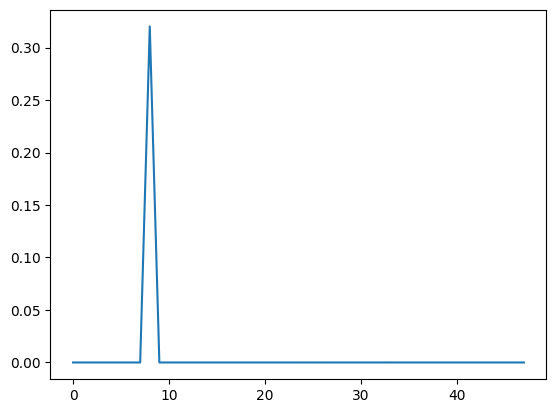

In [26]:
import numpy as np

# 1. 各確率を2乗します (p_k^2)
squared_probs = np.square(predictions)

# 2. 行ごと（各予測ごと）に2乗した値を合計します (axis=1)
sum_squared_probs = np.sum(squared_probs, axis=1)

# 3. 1から合計値を引いてジニ係数を計算します
gini_coefficients = 1 - sum_squared_probs

gini_list = []
# 結果の表示
for i, gini in enumerate(gini_coefficients):
    #print(f"Prediction {i+1} {predictions[i]}: Gini = {gini:.4f}")
    gini_list.append(gini)

plt.plot(gini_list)

In [27]:
#モデルの保存
ins_path = 'trained_model_v0.h5'
model.save(ins_path)